Importação das bibliotecas e configuração da API

In [ ]:
import tweepy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

access_token = ''
access_token_secret = ""  
consumer_key = ""  
consumer_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

I) Mapeamento dos seguidores da fonte

91


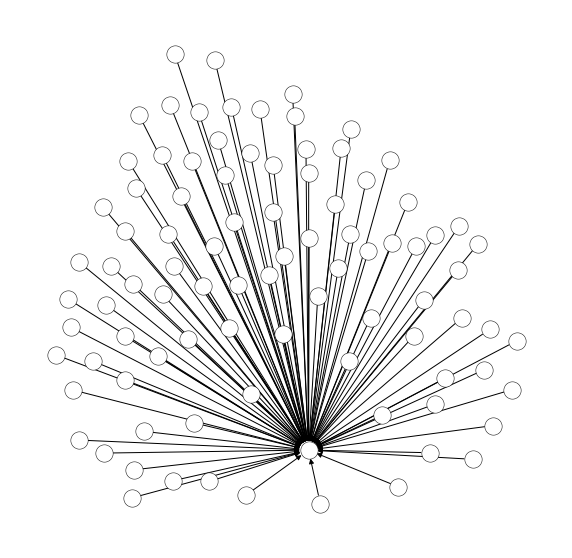

In [ ]:
G = nx.DiGraph()
user_list = [55398226]
followers_list=[]

for userID in user_list:
  try:
    followers = api.followers_ids(userID)
    print(len(followers))
  except tweepy.TweepError:
      print("error")
      continue  
  e = []
  for follow in followers:
    e.append((follow, userID))
  followers_list.append(followers)
G.add_edges_from(e)

pos = nx.spring_layout(G)
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nx.draw(G, pos, node_color="w", with_labels=False, edge_color="black")
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000")

II) Mapeamento dos seguidores dos seguidores da fonte

[57848561, 2311141540, 1277365280952418306, 618116220, 934826405690576896, 1242617642793476098, 1499899832, 913553949940228097, 38567535, 1439543366, 2593827773, 3307398574, 2741163772, 2950902733, 4071477982, 3914701521, 27462943, 180347784, 2763524058, 57704980, 133056728, 834626527, 69973711, 263660571, 2612243266, 333708322, 53205296, 600167763, 1151367822, 37678115, 784656800, 2558785043, 130142747, 143072413, 42235153, 360352430, 2482858842, 143276032, 50488286, 2411432238, 69415604, 2396423648, 2367967402, 40800399, 64864966, 2326283294, 2315632538, 22303804, 341335555, 258568790, 61209140, 73745299, 175449760, 17392070, 40605364, 39166311, 896246352, 411089436, 34601770, 1582714692, 123580420, 128413134, 165129814, 376444368, 707824046, 571020242, 81797119, 81577478, 316431121, 169280800, 58130140, 55275196, 228483399, 256293561, 29715149, 85969939, 40410152, 179143179, 162270738, 139908964, 130650285, 111353821, 109373579, 14584383, 70555768, 81449461, 80355182, 65611805, 5838

Rate limit reached. Sleeping for: 877


error
userID: 3914701521
error
userID: 27462943
661
userID: 180347784
37
userID: 2763524058
0
userID: 57704980
100
userID: 133056728
10
userID: 834626527
13
userID: 69973711
62
userID: 263660571
367
userID: 2612243266
98
userID: 333708322
4
userID: 53205296
5000
userID: 600167763
95
userID: 1151367822
2894
userID: 37678115
error
userID: 784656800


Rate limit reached. Sleeping for: 895


5000
userID: 2558785043
19
userID: 130142747
72
userID: 143072413
5000
userID: 42235153
737
userID: 360352430
2630
userID: 2482858842
1
userID: 143276032
error
userID: 50488286
99
userID: 2411432238
706
userID: 69415604
14
userID: 2396423648
9
userID: 2367967402
4
userID: 40800399
173
userID: 64864966
264
userID: 2326283294


Rate limit reached. Sleeping for: 895


10
userID: 2315632538
2
userID: 22303804
368
userID: 341335555
29
userID: 258568790
37
userID: 61209140
error
userID: 73745299
989
userID: 175449760
37
userID: 17392070
590
userID: 40605364
62
userID: 39166311
error
userID: 896246352
24
userID: 411089436
15
userID: 34601770
error
userID: 1582714692
8
userID: 123580420


Rate limit reached. Sleeping for: 896


error
userID: 128413134
75
userID: 165129814
15
userID: 376444368
27
userID: 707824046
13
userID: 571020242
5
userID: 81797119
14
userID: 81577478
38
userID: 316431121
9
userID: 169280800
23
userID: 58130140
error
userID: 55275196
53
userID: 228483399
45
userID: 256293561
160
userID: 29715149
339
userID: 85969939
84
userID: 40410152


Rate limit reached. Sleeping for: 895


70
userID: 179143179
27
userID: 162270738
12
userID: 139908964
86
userID: 130650285
266
userID: 111353821
57
userID: 109373579
38
userID: 14584383
160
userID: 70555768
325
userID: 81449461
34
userID: 80355182
150
userID: 65611805
10
userID: 58389919
error
userID: 35822282
188
userID: 49818755
5


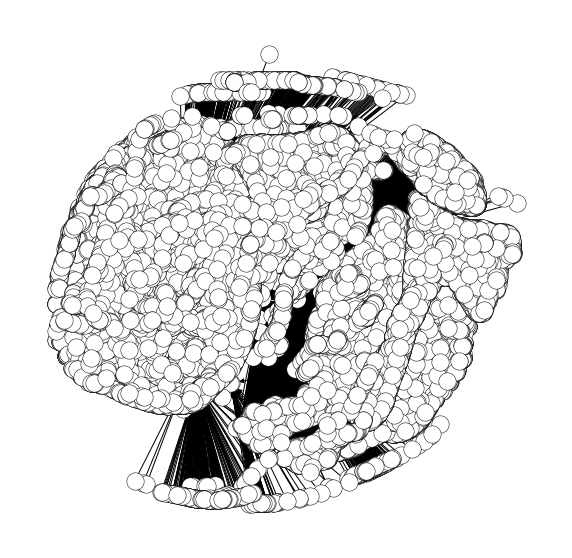

In [ ]:
user_list= followers
print(user_list)
for userID in user_list:
    print(f'userID: {userID}')
    try:
      followers = api.followers_ids(userID)
      print(len(followers))
    except tweepy.TweepError:
      print("error")
      continue  
    e = []
    for follow in followers:
      e.append((follow, userID))
    followers_list.append(followers)
    G.add_edges_from(e)

pos = nx.spring_layout(G)
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nx.draw(G, pos, node_color="w", with_labels=False, edge_color="black")
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000")

plt.savefig('SeguidoresTwitter.png')


III) Calculos de métricas das redes reais para análise



In [ ]:
n = nx.number_of_nodes(G) # Número de nós
m = nx.number_of_edges(G) # Número de enlaces
d = nx.density(G) # Densidade

deg_seq_in = [d for n,d in G.in_degree()] # Distribuição do grau de entrada
deg_seq_out = [d for n,d in G.out_degree()] # Distribuição do grau de saída

CC = nx.average_clustering(G) # Coeficiente de aglomeração

largest_cc_strong = max(nx.strongly_connected_components(G))
largest_cc_weak = max(nx.weakly_connected_components(G))

TMC_strong = nx.average_shortest_path_length(G.subgraph(largest_cc_strong))# Tamanho médio dos caminhos da maior componente fortemente conectada
TMC_weak = nx.average_shortest_path_length(G.subgraph(largest_cc_weak))# Tamanho médio dos caminhos da maior componente fracamente conectada

lambd_in= np.average(deg_seq_in) # Grau médio dos graus de entrada
lambd_out= np.average(deg_seq_out) # Grau médio dos graus de saída

hub = max(G.in_degree(), key= lambda item: item[1])                          #Hub dos graus de entrada
hubs_in=[i for i in range(len(deg_seq_in)) if deg_seq_in[i]==hub[1]]
hubs_in.append(hub[0])

hub1 = max(G.out_degree(), key= lambda item: item[1])                         #Hub dos graus de saída
hubs_out=[i for i in range(len(deg_seq_out)) if deg_seq_out[i]==hub1[1]]
hubs_out.append(hub1[0])

con_comp_strong =nx.number_strongly_connected_components(G)                   
con_comp_weak =nx.number_weakly_connected_components(G)

print(f'|Número de nós: {n}\n|Número de enlaces: {m}\n|Densidade: {d}\n|Coeficiente de aglomeração: {CC}')
print(f'|Distribuição do grau de entrada: {deg_seq_in }\n|Distribuição do grau de saída {deg_seq_out}')
print(f'|Números de componentes fortemente conectadas: {con_comp_strong}\n|Números de componentes fracamente conectadas: {con_comp_weak}')
print(f'|Maior componente fortemente conectada: {largest_cc_strong}\n|Maior componente fracamente conectada: {largest_cc_weak}')
print(f'|TMC da maior componente fortemente conectada: {TMC_strong}\n|TMC da maior componente fracamente conectada: {TMC_weak}')
print(f'|Média do grau de entrada: {TMC_strong}\n|Média do grau de saída: {TMC_weak}')
print(f'|Hub(s) de entrada: {hubs_in}\n|Hub(s) de saída: {hubs_in}')

|Número de nós: 34463
|Número de enlaces: 35542
|Densidade: 2.9925974697424205e-05
|Coeficiente de aglomeração: 0.006196273586311666
|Distribuição do grau de entrada: [0, 91, 6, 2, 16, 34, 60, 5000, 1093, 224, 68, 12, 16, 76, 276, 0, 0, 661, 37, 0, 100, 10, 13, 62, 367, 98, 4, 5000, 95, 2894, 0, 5000, 19, 72, 5000, 737, 2630, 1, 0, 99, 706, 14, 9, 4, 173, 264, 10, 2, 368, 29, 37, 0, 989, 37, 590, 62, 0, 24, 15, 0, 8, 0, 75, 15, 27, 13, 5, 14, 38, 9, 23, 0, 53, 45, 160, 339, 84, 70, 27, 12, 86, 266, 57, 38, 160, 325, 34, 150, 10, 0, 188, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

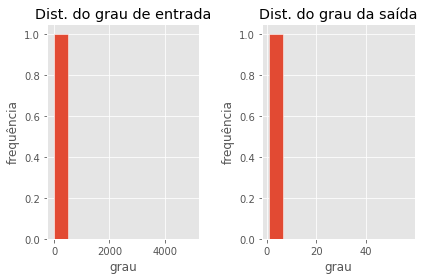

In [ ]:
plt.subplot(1,2,1)
plt.hist(deg_seq_in, edgecolor='white', weights= np.ones_like(deg_seq_in)/len(deg_seq_in));
plt.title('Dist. do grau de entrada')
plt.ylabel('frequência')
plt.xlabel('grau')

plt.subplot(1,2,2)
plt.hist(deg_seq_out, edgecolor='white', weights= np.ones_like(deg_seq_out)/len(deg_seq_out));
plt.title('Dist. do grau da saída')
plt.ylabel('frequência')
plt.xlabel('grau')

plt.tight_layout();
plt.show();